#Ingesting a streaming input from an API

Collecting or scrapping data from The Gaurdian news to get all kinds of headlines. 

In [ ]:
guardian_key='1e296883-c1e6-40e5-9393-91fc20cb4a89'
import json
import requests
url='https://content.guardianapis.com/search?page=1&page-size=200&api-key=1e296883-c1e6-40e5-9393-91fc20cb4a89'
#testing response 
response=requests.get(url)
#loading into json
guardian_response=response.json()
result_list=guardian_response['response']['results']
#accessing headline
result_list[0]['webTitle']

'Shareholders call on Activision Blizzard CEO to resign after employee walkout'

In [ ]:
#accessing date on test
result_list[0]['webPublicationDate']

'2021-11-17T17:46:12Z'

In [ ]:
#test to pull multiple pages
import requests

url='https://content.guardianapis.com/search?'
params = {
    "api-key": "1e296883-c1e6-40e5-9393-91fc20cb4a89",
    "page-size": "200" }

#cur=0
results=[]
for pi in range(1,16):
    params["page"] = pi
    results.append(requests.get(url, params))

In [ ]:
results_dicts = [] 

for ele in range(len(results)):
    results_dicts.append(results[ele].json())

In [ ]:
results_dicts

[{'response': {'currentPage': 1,
   'orderBy': 'newest',
   'pageSize': 200,
   'pages': 11543,
   'results': [{'apiUrl': 'https://content.guardianapis.com/technology/2021/nov/17/activision-vision-bobby-kotick-shareholders-employee-walkout',
     'id': 'technology/2021/nov/17/activision-vision-bobby-kotick-shareholders-employee-walkout',
     'isHosted': False,
     'pillarId': 'pillar/news',
     'pillarName': 'News',
     'sectionId': 'technology',
     'sectionName': 'Technology',
     'type': 'article',
     'webPublicationDate': '2021-11-17T17:46:12Z',
     'webTitle': 'Shareholders call on Activision Blizzard CEO to resign after employee walkout',
     'webUrl': 'https://www.theguardian.com/technology/2021/nov/17/activision-vision-bobby-kotick-shareholders-employee-walkout'},
    {'apiUrl': 'https://content.guardianapis.com/politics/live/2021/nov/17/boris-johnson-mps-second-jobs-pmqs-tory-sleaze-politics-live-news',
     'id': 'politics/live/2021/nov/17/boris-johnson-mps-second-j

In [ ]:
#setting up function for guardian api call
def guardian_call(params):
    response = requests.get(url, params)
    return json.loads(response.text)

articles = guardian_call(params)

In [ ]:
#test
articles['response']['results'][0]

{'apiUrl': 'https://content.guardianapis.com/business/2021/nov/05/mps-inquiry-liberty-steel-tycoon-sanjeev-gupta',
 'id': 'business/2021/nov/05/mps-inquiry-liberty-steel-tycoon-sanjeev-gupta',
 'isHosted': False,
 'pillarId': 'pillar/news',
 'pillarName': 'News',
 'sectionId': 'business',
 'sectionName': 'Business',
 'type': 'article',
 'webPublicationDate': '2021-11-05T00:01:05Z',
 'webTitle': 'MPs call for inquiry into Liberty Steel tycoon Sanjeev Gupta',
 'webUrl': 'https://www.theguardian.com/business/2021/nov/05/mps-inquiry-liberty-steel-tycoon-sanjeev-gupta'}

In [ ]:
def parse_results(results):
    # your code to parse the result to make them easier to insert into the DB
    parsed_result=[]
    for article in results:
        article_list = [article['webTitle'],article['webPublicationDate']]
        parsed_result.append(article_list)
        
            
    return parsed_result

In [ ]:
#test
x=parse_results(articles['response']['results'])

In [ ]:
#test, visualize api results in DF
import pandas as pd
pd.DataFrame(x).head()

0                     1
0  MPs call for inquiry into Liberty Steel tycoon...  2021-11-05T00:01:05Z
1  Biden administration sues Texas over restricti...  2021-11-05T00:00:42Z
2                        Cryptic crossword No 28,595  2021-11-05T00:00:05Z
3  Labour calls for probe into Kwarteng’s comment...  2021-11-04T23:51:00Z
4  Michael Vaughan denies accusations of racism m...  2021-11-04T23:30:22Z

In [ ]:
#creating a blank DF
# Write a function to take your parsed data and insert it into CSV
columns = ['text','date']
df = pd.DataFrame(columns=columns) #blank df
df.to_csv('guardian_headlines.csv')

In [ ]:
#creating a save function
def data_save(parsed_results, csv_filename):
    # your code to save the current results with all of the other results. 
    # I would save the data every time you pull 50 results
    # in case something breaks in the process.
    #reads in blank csv
    existing=pd.read_csv(csv_filename,index_col=0)
    #50 at a time DF
    new = pd.DataFrame(parsed_results,columns=columns)
    df = pd.concat([existing,new])
    df.to_csv(csv_filename)

In [ ]:
#creating a script for calling from API, parsing results, saving results for each page
# Write a script that combines the three functions above into a single process.

# create a variable  to keep track of which result you are in. 
cur = 16

#set up a while loop to go through and grab the result 
while cur < 19:
    #set the offset parameter to be where you currently are in the results 
    params['page'] = cur
    #make your API call with the new offset number
    results = guardian_call(params)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results['response']['results'])
    
    
    # use your function to insert your parsed results into the db
    data_save(parsed_results, 'guardian_headlines.csv')
    #increment the counter by 50 to move on to the next results
    cur += 1

In [ ]:
guardian_df = pd.read_csv('guardian_headlines.csv',index_col=0)

In [ ]:
guardian_df

text                  date
0    Breeders’ Cup classics, cross-country mayhem a...  2021-11-04T08:00:29Z
1    Noma: the hidden childhood disease known as th...  2021-11-04T08:00:29Z
2    Cop26 will be derailed unless the rich world m...  2021-11-04T08:00:29Z
3    Sort Your Life Out With Stacey Solomon: this i...  2021-11-04T08:00:29Z
4    Dutton urges France to ‘put aside hurt feeling...  2021-11-04T07:54:10Z
..                                                 ...                   ...
195  French Connection shareholders back £29m takeover  2021-11-01T17:30:32Z
196  Thomas Tuchel’s Chelsea forwards must match th...  2021-11-01T17:25:47Z
197  Don't mourn, organise! Politics and poverty ha...  2021-11-01T17:21:49Z
198  Narendra Modi pledges India will reach net zer...  2021-11-01T17:20:20Z
199  Republican senator Josh Hawley worries feminis...  2021-11-01T17:14:03Z

[600 rows x 2 columns]

In [ ]:
news_api_key = '934d114414784fd19a75206211492321'

In [ ]:
import requests
url = ('http://newsapi.org/v2/everything?q=keyword&'
       'apiKey=934d114414784fd19a75206211492321')
print(url)
response = requests.get(url)
print (response.json())

http://newsapi.org/v2/everything?q=keyword&apiKey=934d114414784fd19a75206211492321
{'status': 'ok', 'totalResults': 1731, 'articles': [{'source': {'id': None, 'name': 'ReadWrite'}, 'author': 'Nate Nead', 'title': 'How to Avoid Keyword Cannibalization', 'description': 'Search engines are one of the most commonly used tech tools in the world, with the vast majority of the global internet-connected population conducting dozens of searches each day. That’s why so many business owners have turned to the power of search engines,…', 'url': 'https://readwrite.com/2021/10/18/how-to-avoid-keyword-cannibalization/', 'urlToImage': 'https://images.readwrite.com/wp-content/uploads/2021/10/keyword-cannibalization.jpg', 'publishedAt': '2021-10-19T01:13:33Z', 'content': 'Search engines are one of the most commonly used tech tools in the world, with the vast majority of the global internet-connected population conducting dozens of searches each day. Thats why so many … [+8133 chars]'}, {'source': {'id':

In [ ]:
sources=(requests.get('https://newsapi.org/v2/sources?''apiKey=934d114414784fd19a75206211492321'))

In [ ]:
sources_all=sources.json()['sources']
sources_all

[{'category': 'general',
  'country': 'us',
  'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
  'id': 'abc-news',
  'language': 'en',
  'name': 'ABC News',
  'url': 'https://abcnews.go.com'},
 {'category': 'general',
  'country': 'au',
  'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
  'id': 'abc-news-au',
  'language': 'en',
  'name': 'ABC News (AU)',
  'url': 'http://www.abc.net.au/news'},
 {'category': 'general',
  'country': 'no',
  'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
  'id': 'aftenposten',
  'language': 'no',
  'name': 'Aftenposten',
  'url': 'https://www.aftenposten.no'},
 {'category': 'general',
  'country': 'us',
  'description': 'News, analysis from the Middle East and worldwide, multimedi

In [ ]:
sources_all
sources_list=[]
for dic in sources_all:
    sources_list.append(dic['name'])

In [ ]:
#all sources available on newsapi
sources_list

['ABC News',
 'ABC News (AU)',
 'Aftenposten',
 'Al Jazeera English',
 'ANSA.it',
 'Argaam',
 'Ars Technica',
 'Ary News',
 'Associated Press',
 'Australian Financial Review',
 'Axios',
 'BBC News',
 'BBC Sport',
 'Bild',
 'Blasting News (BR)',
 'Bleacher Report',
 'Bloomberg',
 'Breitbart News',
 'Business Insider',
 'Business Insider (UK)',
 'Buzzfeed',
 'CBC News',
 'CBS News',
 'CNN',
 'CNN Spanish',
 'Crypto Coins News',
 'Der Tagesspiegel',
 'Die Zeit',
 'El Mundo',
 'Engadget',
 'Entertainment Weekly',
 'ESPN',
 'ESPN Cric Info',
 'Financial Post',
 'Focus',
 'Football Italia',
 'Fortune',
 'FourFourTwo',
 'Fox News',
 'Fox Sports',
 'Globo',
 'Google News',
 'Google News (Argentina)',
 'Google News (Australia)',
 'Google News (Brasil)',
 'Google News (Canada)',
 'Google News (France)',
 'Google News (India)',
 'Google News (Israel)',
 'Google News (Italy)',
 'Google News (Russia)',
 'Google News (Saudi Arabia)',
 'Google News (UK)',
 'Göteborgs-Posten',
 'Gruenderszene',
 'Hack

In [ ]:
sources_ids=[]
for dic in sources_all:
    sources_ids.append(dic['id'])

In [ ]:
sources_ids

['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'argaam',
 'ars-technica',
 'ary-news',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bild',
 'blasting-news-br',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'crypto-coins-news',
 'der-tagesspiegel',
 'die-zeit',
 'el-mundo',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'focus',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'gruenderszene',
 'hacker-news',
 'handelsblatt',
 'ign',
 'il-sole-24-ore',
 'independent',
 'infobae',
 '

In [ ]:
!pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='934d114414784fd19a75206211492321')

In [ ]:
all_articles = newsapi.get_everything(
                                      sources='reuters,the-washington-post,bloomberg',
                                      to='2021-11-15',
                                      language='en',
                                      page_size=100,
                                      page=1)

In [ ]:
all_articles

{'articles': [{'author': 'Jesse Dougherty',
   'content': 'When finalized, the appointment will be a critical move for a club looking to improve and modernize its minor league system. Rizzo told The Washington Post last week that he would consider internal a… [+1742 chars]',
   'description': 'Watson has been with the Nationals since 2017 and most recently was a special assistant to General Manager Mike Rizzo in the scouting department.',
   'publishedAt': '2021-11-15T23:59:10Z',
   'source': {'id': 'the-washington-post', 'name': 'The Washington Post'},
   'title': 'De Jon Watson will be named the Nationals’ director of player development',
   'url': 'https://www.washingtonpost.com/sports/2021/11/15/de-jon-watson-nationals-player-development/',
   'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/GNDEMDWL2VCQBJ6LA7BNG6UMYU.jpg&w=1440'},
  {'author': None,
   'content': 'New Mexico Governor Bill Richa

In [ ]:
articles_dict=all_articles['articles']

In [ ]:
articles_dict

[{'author': 'Jesse Dougherty',
  'content': 'When finalized, the appointment will be a critical move for a club looking to improve and modernize its minor league system. Rizzo told The Washington Post last week that he would consider internal a… [+1742 chars]',
  'description': 'Watson has been with the Nationals since 2017 and most recently was a special assistant to General Manager Mike Rizzo in the scouting department.',
  'publishedAt': '2021-11-15T23:59:10Z',
  'source': {'id': 'the-washington-post', 'name': 'The Washington Post'},
  'title': 'De Jon Watson will be named the Nationals’ director of player development',
  'url': 'https://www.washingtonpost.com/sports/2021/11/15/de-jon-watson-nationals-player-development/',
  'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/GNDEMDWL2VCQBJ6LA7BNG6UMYU.jpg&w=1440'},
 {'author': None,
  'content': 'New Mexico Governor Bill Richardson poses for a pict

In [ ]:
headlines=[]
for dict in articles_dict:
    headlines.append((dict['publishedAt'],dict['title']))

In [ ]:
headlines

[('2021-11-15T23:59:10Z',
  'De Jon Watson will be named the Nationals’ director of player development'),
 ('2021-11-15T23:46:00Z',
  'Rescuing American in Myanmar, former New Mexico governor scores again in despot diplomacy - Reuters'),
 ('2021-11-15T23:38:28Z',
  '6 Teens Injured in Drive-by Shooting Near Denver Area School'),
 ('2021-11-15T23:38:00Z',
  "N.Korea's Kim visits new city in first public outing in over a month - Reuters"),
 ('2021-11-15T23:36:43Z',
  'Facebook banned the New Mexico Civil Guard. Now prosecutors want their account data--but Facebook says it’s gone.'),
 ('2021-11-15T23:32:00Z',
  'Mexico reports 775 new coronavirus cases, 57 more deaths - Reuters'),
 ('2021-11-15T23:31:48Z',
  'China Bill With Semiconductor Aid to Be Included in U.S. Defense Measure'),
 ('2021-11-15T23:30:00Z',
  'Eric Clapton, Elvis Presley guitars hit the auction block - Reuters'),
 ('2021-11-15T23:26:00Z',
  'Jury awards record $13 million in latest 3M earplug bellwether - Reuters'),
 ('

In [ ]:
all_articles_r = newsapi.get_everything(
                                      sources='bbc-news',
                                      from_param='2021-11-15',
                                      page_size=100,
                                      page=1)

In [ ]:
all_articles_r['articles'][0]['title'] #['publishedAt']

'US annual drug overdose deaths hit record levels'

In [ ]:
list_reuters = all_articles_r['articles']

In [ ]:
lists=[]
for i in range(len(list_reuters)):
    lists.append((list_reuters[i]['title'],list_reuters[i]['publishedAt']))

In [ ]:
list_reuters[0]['title']

'US annual drug overdose deaths hit record levels'

In [ ]:
import pandas as pd
reuters_df=pd.DataFrame(lists,columns=['text','date'])

In [ ]:
reuters_df.drop_duplicates(subset='text',inplace=True)

In [ ]:
reuters_df

text                  date
0    US annual drug overdose deaths hit record levels  2021-11-17T17:22:42Z
1   Vancouver storm: Minister says there is "no do...  2021-11-17T17:17:39Z
2   Racism in cricket: 'Subconscious institutional...  2021-11-17T17:16:05Z
3   Covid-19: Germany facing fourth wave and NI vo...  2021-11-17T17:13:13Z
4   Tree surgeon fined £10,000 for 'life-changing'...  2021-11-17T17:12:10Z
5   South Africa claim betting spike during Ghana ...  2021-11-17T17:11:36Z
6          Merkel: Germany hit by full force of Covid  2021-11-17T17:11:23Z
7   Apple announces self-service repair scheme in ...  2021-11-17T17:07:52Z
8   Reading: Championship club deducted six points...  2021-11-17T17:07:37Z
9   Capitol riot: 'QAnon Shaman' Jacob Chansley se...  2021-11-17T17:06:19Z
10         Celtic: What did we learn from club's AGM?  2021-11-17T17:03:39Z
11  Injection spiking: New medical help from chari...  2021-11-17T16:47:18Z
12  Chris Bryant challenges Johnson over MPs' stan...  2021-11-17T16:46:21Z
13  Firms fined £900,000 over Ayrshire wind farm w...  2021-11-17T16:36:22Z
14  Covid vaccines: Children told to delay jab for...  2021-11-17T16:19:20Z
15  Azeem Rafiq allegation brings Yorkshire scanda...  2021-11-17T16:19:14Z
16  Scotland's bottle deposit return scheme delaye...  2021-11-17T16:11:43Z
17  Women's Super League: Brighton v Manchester Un...  2021-11-17T16:09:31Z
18                               2021/11/17 16:00 GMT  2021-11-17T16:06:00Z
19  Comedian Vir Das causes a stir with 'two India...  2021-11-17T15:52:57Z
20  Delhi shuts schools and colleges as air pollut...  2021-11-17T15:46:00Z
21  Covid-19: Stormont minister vote in favour of ...  2021-11-17T15:44:15Z
22  Driver James Stokoe stabbed to death with son ...  2021-11-17T15:39:10Z
23  Emma Hayes: 'Chelsea fans make Champions Leagu...  2021-11-17T15:38:17Z
24  'Dog phone' could help lonely pooches call owners  2021-11-17T15:37:05Z
25  North will 'benefit massively' from rail upgra...  2021-11-17T15:33:45Z
26  Cybersecurity: wanted criminals living freely ...  2021-11-17T15:27:00Z
27  Government can't find minutes of Covid meeting...  2021-11-17T15:26:07Z
28  WW1 soldiers buried in Belgium a century after...  2021-11-17T15:19:50Z
29  Azeem Rafiq: More than 1,000 calls made to cri...  2021-11-17T15:18:15Z
30  Probe after British F-35 fighter crashes in Me...  2021-11-17T15:17:53Z
31  London father dies of suspected heart attack a...  2021-11-17T15:13:11Z
32  David Cameron quits job after allegations agai...  2021-11-17T15:09:26Z
33                               2021/11/17 15:00 GMT  2021-11-17T15:06:00Z
34  Waterspout: Tornado-like funnels form off coas...  2021-11-17T14:36:07Z
35  Artists denounce Israeli ban on Palestinian ci...  2021-11-17T14:18:49Z
36            IBM claims advance in quantum computing  2021-11-17T14:16:08Z
37                               2021/11/17 14:00 GMT  2021-11-17T14:06:00Z
38  Bobby Kotick: Activision Blizzard employees ca...  2021-11-17T14:02:39Z
39  Mother dies two days after Birmingham hit-and-...  2021-11-17T13:59:08Z
40  Noah Heward: Worcester Warriors winger needs a...  2021-11-17T13:58:19Z
41  Manchester United protest: Ten men arrested ov...  2021-11-17T13:44:31Z
42  Exeter City: FA investigating sixth substitute...  2021-11-17T13:43:36Z
43  West Ham 'reluctantly' accept supporter ban fo...  2021-11-17T13:42:56Z
44  SSE reveals £12.5bn boost in renewables invest...  2021-11-17T13:32:54Z
45  PMQs; Johnson on Starmer on handling Paterson ...  2021-11-17T13:31:01Z
46  Britney Spears discusses life after conservato...  2021-11-17T13:29:13Z
47  Robin Swann: Man charged with making threats t...  2021-11-17T13:29:10Z
48  Archbishop Justin Welby sorry for abuse-accuse...  2021-11-17T13:21:46Z
49  PMQs: Starmer calls Johnson 'a coward, not a l...  2021-11-17T13:19:42Z
50  Queen returns to public duties after Remembran...  2021-11-17T13:14:46Z
51  Wiaan Mulder: Leicestershire sign South Africa...  2021-11-17T13:12:02Z
52                   

In [ ]:
reuters_df.to_csv('bloomberg_100.csv')

#Merging Scrapped Data with base dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from wordcloud import WordCloud, STOPWORDS

import string
from string import punctuation
from matplotlib import style

In [ ]:
#reading in datasets
clickbait_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/clickbait_final.csv',index_col=0)
nytimes_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/nytimes_data_final.csv',index_col=0)

twp_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/TWP_scraped.csv',index_col=0)
bloomberg_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/bloomberg_100.csv',index_col=0)

# reuters_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/reuters_100.csv',index_col=0)
# guardian_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/guardian_headlines.csv',index_col=0)

In [ ]:
#labeling class to 1 for all clickbait headlines
clickbait_df['class']=1
clickbait_df.shape

(11116, 3)

In [ ]:
#labeling 'class' to 0 for non clickbait headlines
nytimes_df['class']=0
nytimes_df.shape

(5299, 3)

In [ ]:
guardian_df['class']=0
guardian_df.shape

(600, 3)

In [ ]:
twp_df.rename(columns={'title':"text",'published':'date'},inplace=True)
twp_df['class']=0

In [ ]:
reuters_df['class']=0
bloomberg_df['class']=0
all_headlines_df=pd.concat([clickbait_df,nytimes_df,guardian_df,twp_df,reuters_df,bloomberg_df])
all_headlines_df.shape

(17382, 3)

In [ ]:
all_headlines_df.drop(columns='date',inplace=True)
dataset2=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/2007_2016_headline_data.csv')
dataset2.rename(columns={'headline':'text','clickbait':'class'},inplace=True)
dataset2

text  class
0                                     Should I Get Bings      1
1          Which TV Female Friend Group Do You Belong In      1
2      The New "Star Wars: The Force Awakens" Trailer...      1
3      This Vine Of New York On "Celebrity Big Brothe...      1
4      A Couple Did A Stunning Photo Shoot With Their...      1
...                                                  ...    ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...      0
31996  British Liberal Democrat Patsy Calton, 56, die...      0
31997  Drone smartphone app to help heart attack vict...      0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...      0
31999  Computer Makers Prepare to Stake Bigger Claim ...      0

[32000 rows x 2 columns]

In [ ]:
df = pd.concat([all_headlines_df,dataset2])
df.shape

(49382, 2)

In [ ]:
df['class'].value_counts()

1    27115
0    22267
Name: class, dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/total_headlines.csv')

In [ ]:
#make text lowercase
df['text']=df['text'].apply(lambda x: x.lower())

In [ ]:
import re
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    #text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('“','',text)
    text = re.sub('”','',text)
    text = re.sub('’','',text)
    text = re.sub('–','',text)
    text = re.sub('‘','',text)
    
    return text

#ADDITIONAL MICROFACTOR: Exaggerated words

Starts with keywords such as - See, LIVE, You won’t believe, Amazing, The Last, You can Now, This is how, This is the, This is what, X Things you need, X reasons why 

Contains keywords such as - Insane, Awesome, Amazing, wont’t believe, must, secret, facts, Ultimate Guide,Ways to Improve,List of the Best, Why We Love,You’ll Never Guess, strategies, ingredients,Click here to learn more, what happened next

In [ ]:
#function to find if string contains exaggerated_words and if so, update new feature with a 1 for yes or 0 for no
exaggerated_words = ['insane', 'awesome', 'amazing', 'won’t believe', 'must', 'secret', 'facts', 'ultimate guide','ways to improve','list of the best', 'why we love','you’ll never guess', 
                     'strategies', 'ingredients','click here to learn more', 'what happened next', 'see', 'live', 'you won’t believe', 'the last', 'you can now', 'this is how', 'this is the',
                     'this is what', 'things you need', 'reasons why']
                     
def contains_exaggerated_words(headline):
  for x in exaggerated_words:

    if x in headline or headline.startswith(('insane', 'awesome', 'amazing', 'won’t believe', 'must', 'secret', 'facts', 'ultimate guide','ways to improve','list of the best', 'why we love','you’ll never guess', 'strategies', 'ingredients','click here to learn more', 'what happened next')):
        return 1
    else: 
        return 0

df['exaggerated_words']=df['text'].apply(contains_exaggerated_words)

In [ ]:
df['exaggerated_words'].value_counts()

0    52005
1      167
Name: exaggerated_words, dtype: int64

In [ ]:
#function to find if string contains a question and if so, update new feature with a 1 for yes or 0 for no
question_words = ['who','what','where','why','when','whose','whom','would','will','how','which','should','could']

def contains_question(headline):
    if "?" in headline or headline.startswith(('who','what','where','why','when','whose','whom','would','will','how','which','should','could','did','do')):
        return 1
    else: 
        return 0

df['question_6']=df['text'].apply(contains_question)

In [ ]:
df.rename(columns={'question_6':'question'},inplace=True)

In [ ]:
df['question'].value_counts()

0    47388
1     4784
Name: question, dtype: int64

In [ ]:
#create function to find if headline contains '!' and create new feature with 1 for yes and 0 for no
def contains_exclamation(headline):
    if "!" in headline: 
        return 1
    else: 
        return 0
df['exclamation']=df['text'].apply(contains_exclamation)

In [ ]:
df.exclamation.value_counts()

0    51614
1      558
Name: exclamation, dtype: int64

In [ ]:
#clean headlines to remove puncuation and links
#create feature to count words of each (before removing stop words and numbers)
#create feature to count if headline starts with a digit or not

feature_engineering_clean = lambda x: clean_text_round1(x)
df.text = pd.DataFrame(df.text.apply(feature_engineering_clean))


#create function to find if headline starts with a digit and create new feature with 1 for yes and 0 for no
def starts_with_num(headline):
    if headline.startswith(('1','2','3','4','5','6','7','8','9')): 
        return 1
    else: 
        return 0

df['starts_with_num']=df['text'].apply(starts_with_num)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
#create feature that counts words in each headline
df['headline_words'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df = df[df['headline_words'] != 0]
df

text  class  \
0      trey gowdy just humiliated adam schiff in fron...      1   
1                 60 netflix titles leaving in july 2020      1   
2      learn how to make a green grape taste like a j...      1   
3      the new july netflix titles are here and there...      1   
4      the courts say sex discrimination laws protect...      1   
...                                                  ...    ...   
52167  to make female hearts flutter in iraq throw a ...      0   
52168  british liberal democrat patsy calton 56 dies ...      0   
52169  drone smartphone app to help heart attack vict...      0   
52170  netanyahu urges pope benedict in israel to den...      0   
52171  computer makers prepare to stake bigger claim ...      0   

       exaggerated_words  question  exclamation  starts_with_num  \
0                      0         0            0                0   
1                      0         0            0                1   
2                      0         0            1                0   
3                      0         0            0                0   
4                      0         0            0                0   
...                  ...       ...          ...              ...   
52167                  0         0            0                0   
52168                  0         0            0                0   
52169                  0         0            0                0   
52170                  0         0            0                0   
52171                  0         0            0                0   

       headline_words  
0                  10  
1                   7  
2                  22  
3                  13  
4                  19  
...               ...  
52167              10  
52168               9  
52169              12  
52170               9  
52171               9  

[52127 rows x 7 columns]

In [ ]:
df.to_csv('with_engineeredfeat_data.csv')

#EDA with the new added Micro Factor

In [ ]:
#cleaning data to remove stopwords & tokenize text for EDA

def tokenize(text):
  text = [word_tokenize(str(x)) for x in text]
  return text
df_debug = df.head(10).copy()
print(df_debug.text)

0    trey gowdy just humiliated adam schiff in fron...
1               60 netflix titles leaving in july 2020
2    learn how to make a green grape taste like a j...
3    the new july netflix titles are here and there...
4    the courts say sex discrimination laws protect...
5    we need to talk about how 30 rock massively fa...
6    so theres a ton of love is blind cheating dram...
7    jonathan van ness from queer eye is a fashion ...
8    15 tiny details in cartoons that you didnt cat...
9    17 cats and dogs who didnt even try to hide th...
Name: text, dtype: object


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
df_debug.text = tokenize(df_debug.text)

stopwords_list = stopwords.words('english')
df_debug.text = df_debug['text'].apply(lambda x: [item for item in x if item not in stopwords_list])
print(df_debug.text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0    [trey, gowdy, humiliated, adam, schiff, front,...
1           [60, netflix, titles, leaving, july, 2020]
2    [learn, make, green, grape, taste, like, jolly...
3    [new, july, netflix, titles, theres, much, goo...
4    [courts, say, sex, discrimination, laws, prote...
5    [need, talk, 30, rock, massively, failed, lati...
6    [theres, ton, love, blind, cheating, drama, su...
7    [jonathan, van, ness, queer, eye, fashion, ico...
8    [15, tiny, details, cartoons, didnt, catch, ki...
9    [17, cats, dogs, didnt, even, try, hide, jealo...
Name: text, dtype: object


In [ ]:
df.text = tokenize(df.text)

stopwords_list = stopwords.words('english')
df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])
print(df_debug.text)

0    [trey, gowdy, humiliated, adam, schiff, front,...
1           [60, netflix, titles, leaving, july, 2020]
2    [learn, make, green, grape, taste, like, jolly...
3    [new, july, netflix, titles, theres, much, goo...
4    [courts, say, sex, discrimination, laws, prote...
5    [need, talk, 30, rock, massively, failed, lati...
6    [theres, ton, love, blind, cheating, drama, su...
7    [jonathan, van, ness, queer, eye, fashion, ico...
8    [15, tiny, details, cartoons, didnt, catch, ki...
9    [17, cats, dogs, didnt, even, try, hide, jealo...
Name: text, dtype: object


In [ ]:
#creating seperate dataframes for each class
df_cb=df[df['class']==1]

In [ ]:
df_noncb=df[df['class']==0]

In [ ]:
#creating a list of unique words for each class
cb_list=list(df_cb['text'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

20291

In [ ]:
noncb_list=list(df_noncb['text'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

23485

In [ ]:
flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]


cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

In [ ]:
#top 20 clickbait words 
cb_freq.most_common(20)

[('people', 1745),
 ('things', 1416),
 ('make', 1038),
 ('know', 1005),
 ('new', 947),
 ('like', 809),
 ('17', 785),
 ('best', 733),
 ('actually', 730),
 ('21', 706),
 ('times', 658),
 ('based', 650),
 ('get', 644),
 ('need', 644),
 ('19', 640),
 ('coronavirus', 632),
 ('life', 591),
 ('heres', 586),
 ('one', 585),
 ('trump', 565)]

In [ ]:
#top 20 non-clickbait words 
noncb_freq.most_common(20)

[('us', 1483),
 ('new', 1259),
 ('police', 598),
 ('uk', 545),
 ('says', 501),
 ('dies', 492),
 ('coronavirus', 459),
 ('election', 432),
 ('trump', 423),
 ('dead', 404),
 ('first', 381),
 ('killed', 373),
 ('results', 339),
 ('china', 337),
 ('president', 330),
 ('court', 325),
 ('primary', 322),
 ('two', 319),
 ('world', 316),
 ('australian', 308)]

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

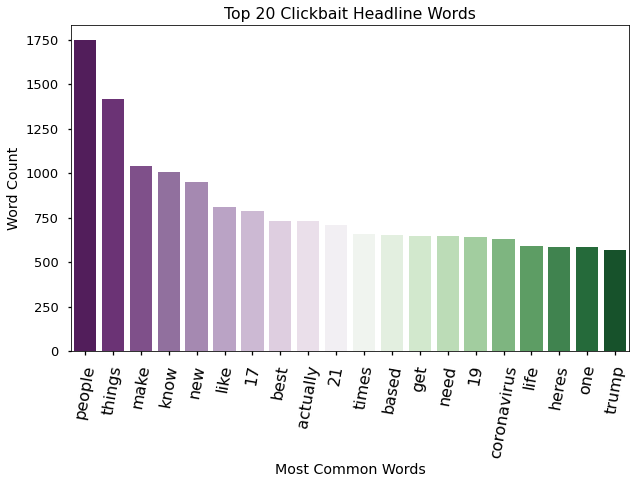

In [ ]:
#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='PRGn')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.show()

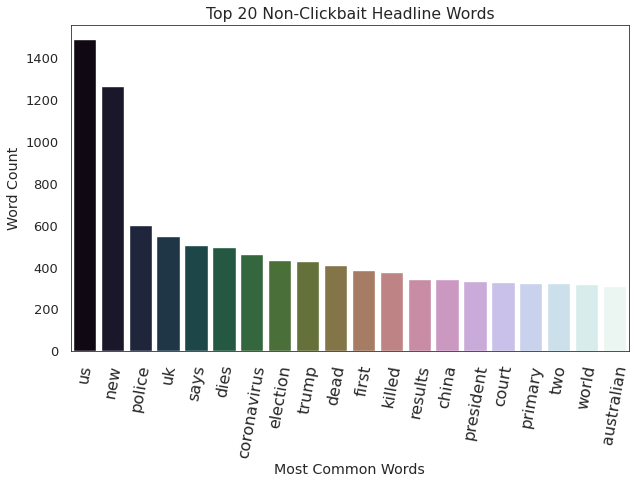

In [ ]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(noncb_bar_words, noncb_bar_counts,palette='cubehelix')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [ ]:
# Getting data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
print(len(cb_bar_words))
print(len(cb_bar_counts))
clickbait_dictionary = {cb_bar_words[i]: cb_bar_counts[i] for i in range(len(cb_bar_words))}
nonclickbait_dictionary = {noncb_bar_words[i]: noncb_bar_counts[i] for i in range(len(noncb_bar_words))}


20
20


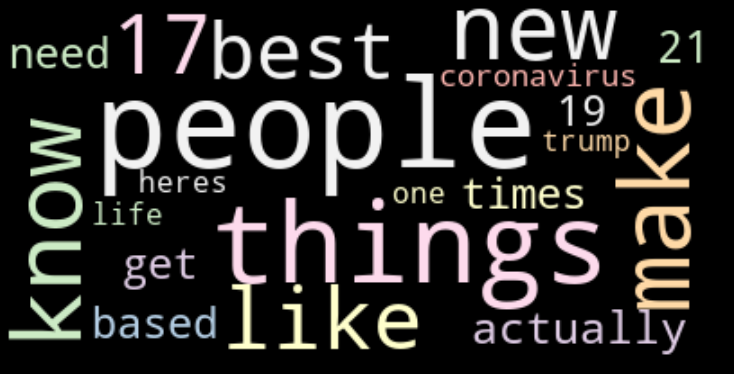

In [ ]:
# Create the clickbait word cloud:
wordcloud = WordCloud(colormap='Pastel1').generate_from_frequencies(clickbait_dictionary)
# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:

plt.savefig('clickbait_wc')

plt.show()

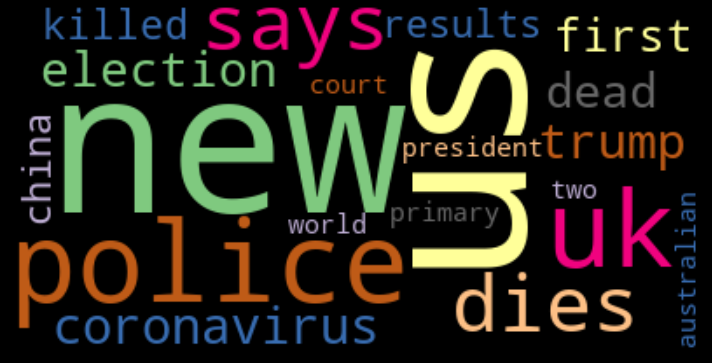

In [ ]:
# Create the non-clickbait word cloud:

wordcloud = WordCloud(colormap='Accent').generate_from_frequencies(nonclickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
plt.tight_layout()
plt.savefig('clickbait_wc')

plt.show()

In [ ]:
#class variable countplot
#visualizing class frequency of dataset
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
fig1=sns.countplot(df['class'], alpha =.80, palette= ['#0099e6','#00b3b3'])
plt.title('Clickbait vs Non-Clickbait')
plt.ylabel('# of Headlines')
plt.xlabel('Type of Headline')
fig1.set(xticklabels=['Non-Clickbait','Clickbait'])
plt.tight_layout()
plt.savefig('class_dist')
plt.show()

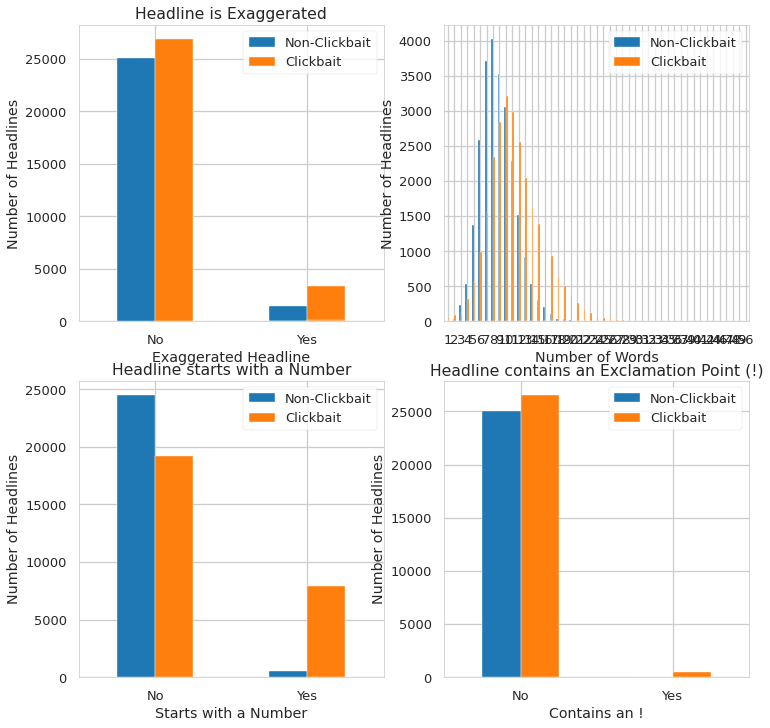

In [ ]:
#plotting engineered features to compare by class 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plot = df.groupby('question')['class'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Question Headline')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is a Question')

plot = df.groupby('exaggerated_words')['class'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Exaggerated Headline')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is Exaggerated')

plot = df.groupby('headline_words')['class'].value_counts().unstack().plot.bar(ax=axes[0,1], rot=0)
plot.set_xlabel('Number of Words')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])


plot = df.groupby('starts_with_num')['class'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
plot.set_xlabel('Starts with a Number')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline starts with a Number')

plot = df.groupby('exclamation')['class'].value_counts().unstack().plot.bar(ax=axes[1,1], rot=0)
plot.set_xlabel('Contains an !')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline contains an Exclamation Point (!)')

style.use('fivethirtyeight')
plt.show()

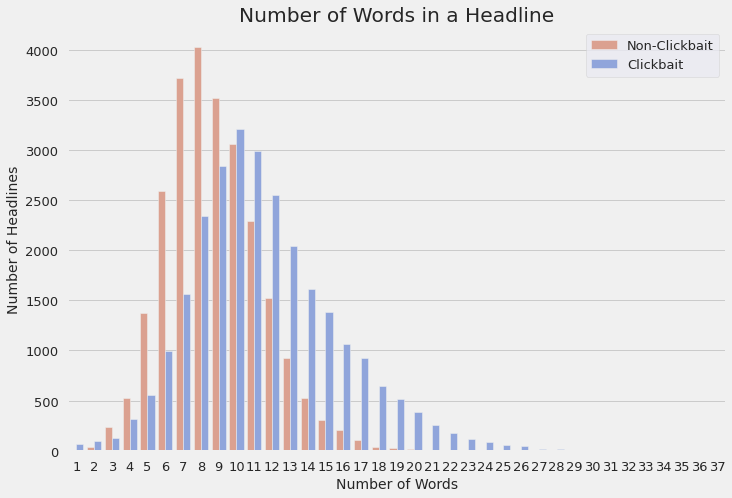

In [ ]:
#replotting headline word comparison plot with smaller range

df_words = df[df['headline_words'] < 38]

sns.countplot(df_words['headline_words'],hue=df_words['class'],palette=['#E79A84','#849FE7'],data=df_words)
sns.set_style('darkgrid')
plt.xlabel('Number of Words',size=14)
plt.ylabel('Number of Headlines', size=14)
plt.legend(title=None,labels=['Non-Clickbait','Clickbait'],loc='upper right')
plt.title('Number of Words in a Headline')
plt.tight_layout()
plt.savefig('num_words_comparison')

plt.show()

In [ ]:
df['class'].value_counts()

1    27070
0    25057
Name: class, dtype: int64

In [ ]:
df.shape

(52127, 7)

In [ ]:
df.head(5)

text  class  \
0  [trey, gowdy, humiliated, adam, schiff, front,...      1   
1         [60, netflix, titles, leaving, july, 2020]      1   
2  [learn, make, green, grape, taste, like, jolly...      1   
3  [new, july, netflix, titles, theres, much, goo...      1   
4  [courts, say, sex, discrimination, laws, prote...      1   

   exaggerated_words  question  exclamation  starts_with_num  headline_words  
0                  0         0            0                0              10  
1                  0         0            0                1               7  
2                  0         0            1                0              22  
3                  0         0            0                0              13  
4                  0         0            0                0              19

In [ ]:
#Create stopwords list

stopwords_list = stopwords.words('english')

features = df.drop(columns='class')
y = df['class']

#classes are mostly balanced
y.value_counts(normalize=True)

1    0.519309
0    0.480691
Name: class, dtype: float64

In [ ]:
features

text  exaggerated_words  \
0      [trey, gowdy, humiliated, adam, schiff, front,...                  0   
1             [60, netflix, titles, leaving, july, 2020]                  0   
2      [learn, make, green, grape, taste, like, jolly...                  0   
3      [new, july, netflix, titles, theres, much, goo...                  0   
4      [courts, say, sex, discrimination, laws, prote...                  0   
...                                                  ...                ...   
52167  [make, female, hearts, flutter, iraq, throw, s...                  0   
52168  [british, liberal, democrat, patsy, calton, 56...                  0   
52169  [drone, smartphone, app, help, heart, attack, ...                  0   
52170  [netanyahu, urges, pope, benedict, israel, den...                  0   
52171  [computer, makers, prepare, stake, bigger, cla...                  0   

       question  exclamation  starts_with_num  headline_words  
0             0            0                0              10  
1             0            0                1               7  
2             0            1                0              22  
3             0            0                0              13  
4             0            0                0              19  
...         ...          ...              ...             ...  
52167         0            0                0              10  
52168         0            0                0               9  
52169         0            0                0              12  
52170         0            0                0               9  
52171         0            0                0               9  

[52127 rows x 6 columns]

In [ ]:
features.dtypes

text                 object
exaggerated_words     int64
question              int64
exclamation           int64
starts_with_num       int64
headline_words        int64
dtype: object

In [ ]:
features['text'] = features['text'].astype(str)

#Training the Model

In [ ]:
#first splitting data for test/train sets 
#ngram range -> unigrams and bigrams 

X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)

tfidf = TfidfVectorizer(stop_words = stopwords_list,ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train['text'])
tfidf_text_test = tfidf.transform(X_test['text'])

X_train_ef = X_train.drop(columns='text')
X_test_ef = X_test.drop(columns='text')

In [ ]:
#combine tf-idf vectors with the engineered features and store as sparse arrays
from scipy import sparse

X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()

In [ ]:
X_train_ef

exaggerated_words  question  exclamation  starts_with_num  \
19538                  0         0            0                0   
28029                  0         0            0                0   
3376                   0         0            0                0   
33958                  0         0            0                0   
48840                  0         0            0                0   
...                  ...       ...          ...              ...   
23497                  0         1            0                0   
23820                  0         0            0                1   
37180                  0         0            0                0   
27143                  0         1            0                0   
48528                  0         0            0                0   

       headline_words  
19538              16  
28029              10  
3376               16  
33958               9  
48840              10  
...               ...  
23497               8  
23820              12  
37180              14  
27143              11  
48528              10  

[39095 rows x 5 columns]

In [ ]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

##Dummy Classifier

In [ ]:
#baseline model to predict majority class
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
dc_classifier = DummyClassifier(strategy='most_frequent')

dc_classifier.fit(X_train, y_train)

dc_train_preds = dc_classifier.predict(X_train)
dc_test_preds = dc_classifier.predict(X_test)

print(train_results(dc_train_preds))
print(test_results(dc_test_preds))

('Training Accuracy:', 0.5179946284691137, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.5232504604051565, ' Testing Recall:', 1.0)


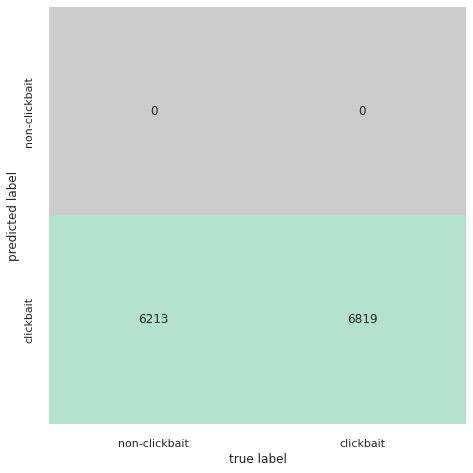

In [ ]:
#confusion matrix on test set Dummy Classifier
sns.set()

cm_dc = confusion_matrix(y_test, dc_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2_r", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Naive Bayes

In [ ]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(X_train, y_train)

nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.9986954853561837, ' Training Recall:', 0.9992099155597255)
('Testing Accuracy:', 0.9300184162062615, ' Testing Recall:', 0.9416336706261915)


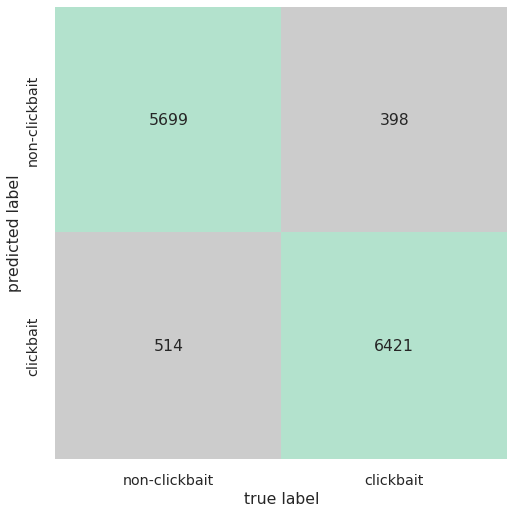

In [ ]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2_r", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('nbcm5')
plt.show();

## Random Forest Classifier

In [ ]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced' )
rf_classifier.fit(X_train, y_train)

rf_test_preds = rf_classifier.predict(X_test)
rf_train_preds = rf_classifier.predict(X_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9063075506445673, ' Testing Recall:', 0.9312215867429242)


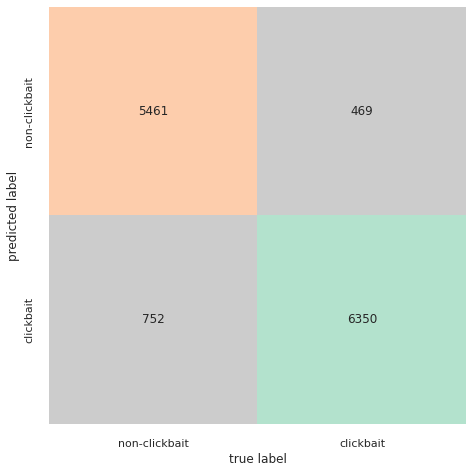

In [ ]:
#confusion matrix on test set RFC Classifier (no grid search)
sns.set()

cm_dc = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2_r", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#RFC is slightly overfitting, re-running with Gridsearch 
from sklearn.model_selection import GridSearchCV

rfc_grid = RandomForestClassifier(class_weight='balanced')

param_grid_rfc={
    'max_depth': [200,300],
    'n_estimators': [800,900],
}

# **SVM**

('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9323971761817066, ' Testing Recall:', 0.9260888693356797)


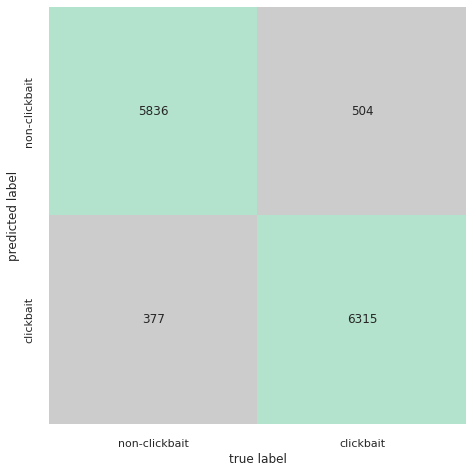

In [ ]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(X_train, y_train)

svm_test_preds = svm_classifier.predict(X_test)
svm_train_preds = svm_classifier.predict(X_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2_r", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

## **Logistic Regression**

('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9315531000613874, ' Testing Recall:', 0.9238891333040036)


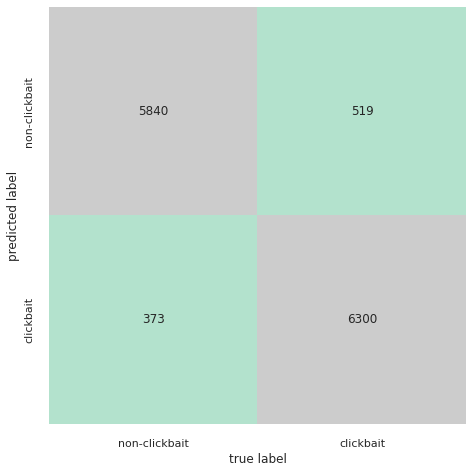

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(X_train,y_train)

lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# **XGB Boost**

In [ ]:

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_test_preds = xgb_clf.predict(X_test)
xgb_train_preds = xgb_clf.predict(X_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))
#confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Pastel2_r", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

('Testing Accuracy:', 0.8080877839165131, ' Testing Recall:', 0.8005572664613579)
('Training Accuracy:', 0.8189026729760839, ' Training Recall:', 0.8069231149079058)


# Model Interpretations and takeaway

In [ ]:
#NB coefficients
#creating dataframe for NB coefficients to evaluate the highest/lowest coefficients
coef_nb_2 = pd.DataFrame(nb_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_nb=coef_nb_2.T

In [ ]:
#creating column for feat names
#run cells below first
coef_df_nb['tokens'] = all_feat_names_2

In [ ]:
nb_classifier.coef_[0]

array([ -7.86635353,  -4.85460748,  -6.82610958, ..., -15.68277051,
       -15.68277051, -15.68277051])

In [ ]:
#creating EF name list
engf_name_list=list(X_train_ef.columns)

In [ ]:
engf_name_list

['exaggerated_words',
 'question',
 'exclamation',
 'starts_with_num',
 'headline_words']

In [ ]:
len(tfidf.get_feature_names())

203136

In [ ]:
#creating all feature names list with engineered features and tfidf names
all_feat_names_2 = []

In [ ]:
for i in engf_name_list:
    all_feat_names_2.append(i)

In [ ]:
for i in tfidf.get_feature_names():
    all_feat_names_2.append(i)

In [ ]:
len(all_feat_names_2)

203141

In [ ]:
coef_df_nb.set_index('tokens',inplace=True)
coef_df_nb.columns

Index([0], dtype='object')

In [ ]:
coef_df_nb.sort_values(by=0,ascending=False).head(15)

0
tokens                     
headline_words    -0.322249
starts_with_num   -3.997397
question          -4.854607
exclamation       -6.826110
people            -7.553641
things            -7.577053
know              -7.775630
exaggerated_words -7.866354
make              -7.937522
17                -8.061397
actually          -8.073725
based             -8.093682
21                -8.097429
like              -8.131560
best              -8.189569

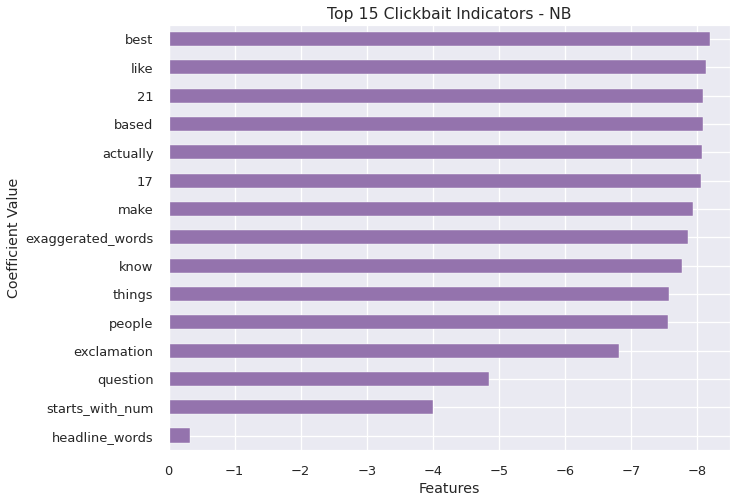

In [ ]:
#negative coefficients for non-clickbait
plt.style.use('seaborn-talk')

coef_df_nb[0].sort_values(ascending=False).head(15).plot(kind='barh',color='#9473AD')
plt.title("Top 15 Clickbait Indicators - NB")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xlim(0, -8.5)
plt.tight_layout()
plt.savefig('CB_coefs_nb')
plt.show()

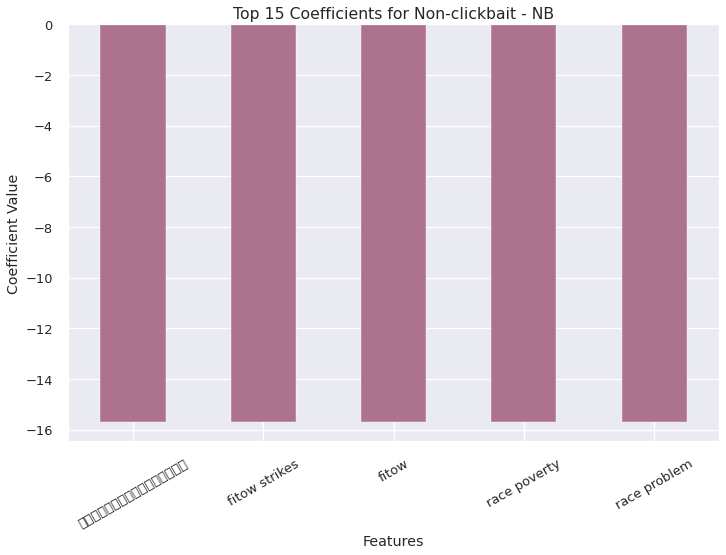

In [ ]:
plt.style.use('seaborn-talk')
coef_df_nb[0].sort_values(ascending=True).head().plot(kind='bar',color='#AD738C')
plt.title("Top 15 Coefficients for Non-clickbait - NB")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=30)
plt.show()

# **SVM Coefficients**

In [ ]:
#SVM interpretations 
#svm coefficients
#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_svm = pd.DataFrame(svm_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_svm = coef_svm.T

In [ ]:
coef_df_svm['tokens'] = all_feat_names_2

In [ ]:
coef_df_svm.set_index('tokens',inplace=True)

In [ ]:
coef_df_svm[0].sort_values(ascending=False).head(20).plot(kind='bar',color='#73ADA7')
plt.title("Top 20 Coefficients for Clickbait/Non-Clickbait Classification - SVM")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

# **Logistic Regression coefficients**

In [ ]:
lr.coef_
#svm coefficients
#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_lr = pd.DataFrame(lr.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_lr=coef_lr.T

In [ ]:
coef_df_lr['tokens']=all_feat_names_2

In [ ]:
coef_df_lr

0             tokens
0       3.953596  exaggerated_words
1       1.375022           question
2       6.389846        exclamation
3       4.280889    starts_with_num
4       0.445733     headline_words
...          ...                ...
203136 -0.753236               özil
203137 -0.753236      özil omission
203138 -0.330386                śrī
203139 -0.330386          śrī satya
203140 -2.045611   新一波在北京的疫情你有受到波及么

[203141 rows x 2 columns]

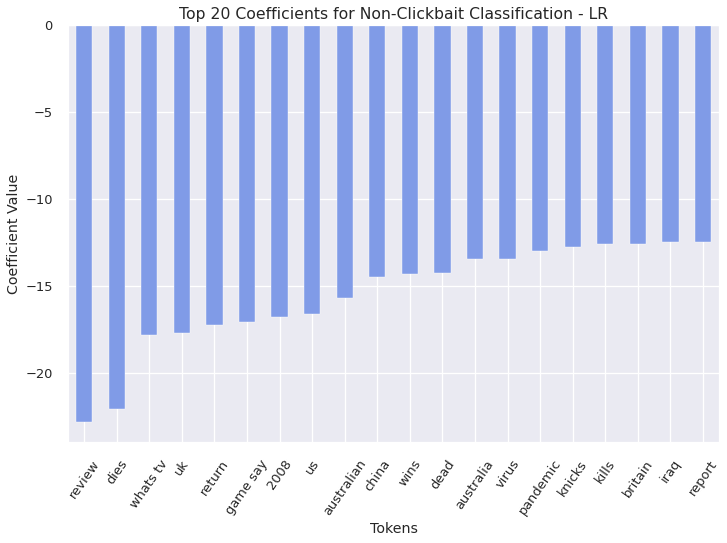

In [ ]:
coef_df_lr.set_index('tokens',inplace=True)
coef_df_lr[0].sort_values(ascending=True).head(20).plot(kind='bar' ,color='#809BE7')
plt.title("Top 20 Coefficients for Non-Clickbait Classification - LR")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

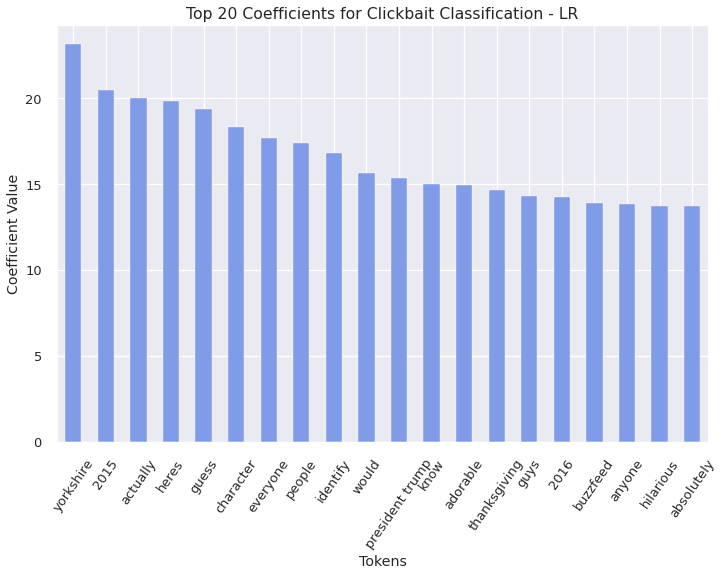

In [ ]:
coef_df_lr[0].sort_values(ascending=False).head(20).plot(kind='bar', color = '#809BE7')
plt.title("Top 20 Coefficients for Clickbait Classification - LR")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

In [ ]:
df

text  class  \
0      [trey, gowdy, humiliated, adam, schiff, front,...      1   
1             [60, netflix, titles, leaving, july, 2020]      1   
2      [learn, make, green, grape, taste, like, jolly...      1   
3      [new, july, netflix, titles, theres, much, goo...      1   
4      [courts, say, sex, discrimination, laws, prote...      1   
...                                                  ...    ...   
52167  [make, female, hearts, flutter, iraq, throw, s...      0   
52168  [british, liberal, democrat, patsy, calton, 56...      0   
52169  [drone, smartphone, app, help, heart, attack, ...      0   
52170  [netanyahu, urges, pope, benedict, israel, den...      0   
52171  [computer, makers, prepare, stake, bigger, cla...      0   

       exaggerated_words  question  exclamation  starts_with_num  \
0                      0         0            0                0   
1                      0         0            0                1   
2                      0         0            1                0   
3                      0         0            0                0   
4                      0         0            0                0   
...                  ...       ...          ...              ...   
52167                  0         0            0                0   
52168                  0         0            0                0   
52169                  0         0            0                0   
52170                  0         0            0                0   
52171                  0         0            0                0   

       headline_words  
0                  10  
1                   7  
2                  22  
3                  13  
4                  19  
...               ...  
52167              10  
52168               9  
52169              12  
52170               9  
52171               9  

[52127 rows x 7 columns]

In [ ]:
df_classifier =df.copy()

In [ ]:
df_classifier.dtypes

text                 object
class                 int64
exaggerated_words     int64
question              int64
exclamation           int64
starts_with_num       int64
headline_words        int64
dtype: object

In [ ]:
df_classifier['text'] = df_classifier['text'].astype(object)

#Applying Muller Loop to get the best score

In [ ]:
features['text'] = features['text'].astype(object)

y = df['class']

#classes are mostly balanced
y.value_counts(normalize=True)

1    0.519309
0    0.480691
Name: class, dtype: float64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         #"Naive Bayes",
         "QDA"]
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#first splitting data for test/train sets 
#ngram range -> unigrams and bigrams 

X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)

tfidf = TfidfVectorizer(stop_words = stopwords_list,ngram_range = (1,2))

tfidf_text_train = tfidf.fit_transform(X_train['text'])
tfidf_text_test = tfidf.transform(X_test['text'])


X_train_ef = X_train.drop(columns='text')
X_test_ef = X_test.drop(columns='text')


# # X = df_classifier['text']
# # y = df_classifier['test']
# # X = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = \
#     train_test_split(features, y, random_state=20)
# TODO (Apply): All cross-validation
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train_ef, y_train)
    score = 100.0 * clf.score(X_train_ef, y_train)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))


Classifier = Nearest Neighbors, Score (test, accuracy) = 67.53, Training time = 3.07 seconds
Classifier = Linear SVM, Score (test, accuracy) = 76.60, Training time = 55.78 seconds
Classifier = RBF SVM, Score (test, accuracy) = 77.31, Training time = 77.09 seconds
Classifier = Decision Tree, Score (test, accuracy) = 77.10, Training time = 0.03 seconds
Classifier = Random Forest, Score (test, accuracy) = 77.18, Training time = 0.13 seconds
Classifier = Neural Net, Score (test, accuracy) = 76.95, Training time = 10.25 seconds
Classifier = AdaBoost, Score (test, accuracy) = 76.55, Training time = 1.17 seconds
Classifier = QDA, Score (test, accuracy) = 66.96, Training time = 0.02 seconds
--------------------------------------------------------------------------------
Best --> Classifier = RBF SVM, Score (test, accuracy) = 77.31


Classifier = Nearest Neighbors, Score (test, accuracy) = 67.53, Training time = 3.07 seconds
Classifier = Linear SVM, Score (test, accuracy) = 76.60, Training time = 55.78 seconds
Classifier = RBF SVM, Score (test, accuracy) = 77.31, Training time = 77.09 seconds
Classifier = Decision Tree, Score (test, accuracy) = 77.10, Training time = 0.03 seconds
Classifier = Random Forest, Score (test, accuracy) = 77.18, Training time = 0.13 seconds
Classifier = Neural Net, Score (test, accuracy) = 76.95, Training time = 10.25 seconds
Classifier = AdaBoost, Score (test, accuracy) = 76.55, Training time = 1.17 seconds
Classifier = QDA, Score (test, accuracy) = 66.96, Training time = 0.02 seconds

###**Best --> Classifier = RBF SVM, Score (test, accuracy) = 77.31**

#Pickle the Model

In [ ]:
import pandas as pd
import pickle
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
pickle.dump(coef_df_svm, open('coef_df_svm.pkl', 'wb'))

#Load the Model to take input stream of data and analyze.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
pickled_model = pickle.load(open('coef_df_svm.pkl', 'rb'))


#### Using pickled_model we can inject a steady stream of input from the news_api to analyze the data to know whether it is Clickbait or not.

#Calling the News API to fetch headlines

In [ ]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='934d114414784fd19a75206211492321')
def get_news(source_from):
  all_articles = newsapi.get_everything(
                                        sources= source_from,
                                        to='2021-11-15',
                                        language='en',
                                        page_size=100,
                                        page=1)
  articles_dict=all_articles['articles']
  headlines=[]
  for dict in articles_dict:
      headlines.append((dict['publishedAt'],dict['title']))



In [ ]:
get_news('the-washington-post')
headlines

[('2021-11-15T23:59:10Z',
  'De Jon Watson will be named the Nationals’ director of player development'),
 ('2021-11-15T23:36:43Z',
  'Facebook banned the New Mexico Civil Guard. Now prosecutors want their account data--but Facebook says it’s gone.'),
 ('2021-11-15T23:15:09Z', 'A great power game is already underway in space'),
 ('2021-11-15T22:31:09Z',
  'Proud Boys leader seeks release from D.C. jail, alleging inhumane conditions - The Washington Post'),
 ('2021-11-15T22:13:55Z',
  "Judge rejects mistrial request in Arbery case, calls defense lawyer's comments 'reprehensible' - The Washington Post"),
 ('2021-11-15T22:00:51Z',
  'Specter of new restrictions rises in Europe with coronavirus cases spiking once again'),
 ('2021-11-15T21:46:55Z',
  'The Trump-era politicization of the pandemic that still benefits Joe Biden'),
 ('2021-11-15T21:45:31Z',
  'PM Update: Chilly tonight as winds ease into Tuesday'),
 ('2021-11-15T21:41:55Z',
  'Mayor Andrew Bradshaw was charged with posting reve

In [ ]:
def run_Pickled_model():
  X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)

  tfidf = TfidfVectorizer(stop_words = stopwords_list,ngram_range = (1,2))

  tfidf_text_train = tfidf.fit_transform(X_train['text'])
  tfidf_text_test = tfidf.transform(X_test['text'])


  X_train_ef = X_train.drop(columns='text')
  X_test_ef = X_test.drop(columns='text')

  # Classifier - Algorithm - SVM
  # fit the training dataset on the classifier
  SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
  SVM.fit(tfidf_text_train,y_train)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(tfidf_text_test)
  # Use accuracy_score function to get the accuracy
  print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

In [ ]:
run_Pickled_model()

SVM Accuracy Score ->  92.1500920810313


###**Conclusion:**

As seen in all the above results, we call the news api and obtain the latest headlines. This is then run through the pickled classifier to provide the results.